<a href="https://colab.research.google.com/github/isg15/Non-Invasive-Anemia-Detection/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import keras
import os
from skimage import io
import numpy as np
import pandas as pd
import csv
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("drive/MyDrive/Detection of anemia using conjunctival images.csv")
dataset.head()


,Image number,Study number,Haemoglobin,Palpebral Conjunctiva EI (LX5),Duplicated/example?,Clinican 1,Clinican 2,Clinican 3,Key,Unnamed: 9,Unnamed: 10
0,1,002B,121,26.033,Duplicated (Image 14),No,No,No,Where yes indicates suspicion of anaemia and n...,NaN,NaN
1,2,003C,131,20.077,NaN,Yes,No,No,NaN,NaN,NaN
2,3,004D,134,15.672,NaN,Yes,No,Yes,NaN,NaN,NaN
3,4,005E,84,19.757,NaN,Yes,Yes,No,NaN,NaN,NaN
4,5,006F,110,17.512,NaN,No,No,No,Duplicated entries are italicised and shaded,NaN,NaN


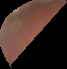

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 68  77 117]
  [ 66  76 115]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 64  74 115]
  [ 63  73 114]
  [ 60  71 111]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 64  74 117]
  [ 63  73 116]
  [ 68  68 119]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


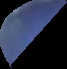

In [ ]:
myImg = cv2.imread("drive/MyDrive/Fingernails/Fingernails/Non-Anrmic-FN-195.png")
#print(myImg)
cv2_imshow(myImg)
print(myImg)
cv2_imshow(cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB))

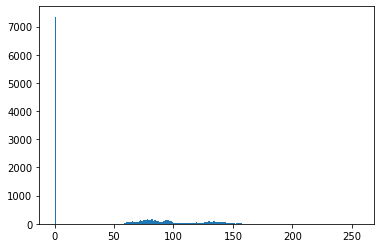

In [ ]:
plt.hist(cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB).ravel(),bins = 256, range = [0,256])
plt.show()

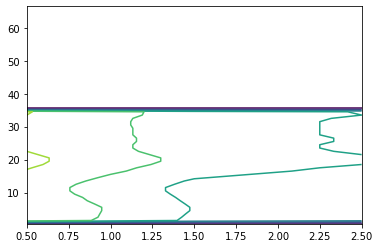

In [ ]:
plt.contour(cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB)[0], origin = "image")

In [ ]:
datasetmod1=dataset.iloc[:,:8]
del datasetmod1['Study number']
del datasetmod1['Image number']
del datasetmod1['Duplicated/example?']
datasetmod1.head()

,Haemoglobin,Palpebral Conjunctiva EI (LX5),Clinican 1,Clinican 2,Clinican 3
0,121,26.033,No,No,No
1,131,20.077,Yes,No,No
2,134,15.672,Yes,No,Yes
3,84,19.757,Yes,Yes,No
4,110,17.512,No,No,No


In [ ]:
print(datasetmod1.keys())

Index(['Haemoglobin', 'Palpebral Conjunctiva EI (LX5)', 'Clinican 1',
       'Clinican 2', 'Clinican 3 '],
      dtype='object')


In [ ]:
new=[]
for i in range(len(datasetmod1)):
  if datasetmod1['Clinican 1'][i]=="Yes" and datasetmod1['Clinican 2'][i]=="Yes" and datasetmod1['Clinican 3 '][i]=="Yes":
    new.append('Yes')
  elif datasetmod1['Clinican 1'][i]=="Yes" and datasetmod1['Clinican 2'][i]=="Yes" and datasetmod1['Clinican 3 '][i]!="Yes":
    new.append('Yes')
  elif datasetmod1['Clinican 1'][i]=="Yes" and datasetmod1['Clinican 2'][i]!="Yes" and datasetmod1['Clinican 3 '][i]=="Yes":
    new.append('Yes')
  elif datasetmod1['Clinican 1'][i]!="Yes" and datasetmod1['Clinican 2'][i]=="Yes" and datasetmod1['Clinican 3 '][i]=="Yes":
    new.append("Yes")
  else:
    new.append('No')

In [ ]:
print(len(new),len(datasetmod1['Clinican 1']))

104 104


In [ ]:
datasetmod1['Final Diagnosis']=new
datasetmod1.head()

,Haemoglobin,Palpebral Conjunctiva EI (LX5),Clinican 1,Clinican 2,Clinican 3,Final Diagnosis
0,121,26.033,No,No,No,No
1,131,20.077,Yes,No,No,No
2,134,15.672,Yes,No,Yes,Yes
3,84,19.757,Yes,Yes,No,Yes
4,110,17.512,No,No,No,No


In [ ]:
x= datasetmod1.iloc[:,:-1].values
y= datasetmod1.iloc[:,3].values
print(x)

[[121 26.033 'No' 'No' 'No']
 [131 20.077 'Yes' 'No' 'No']
 [134 15.672 'Yes' 'No' 'Yes']
 [84 19.757 'Yes' 'Yes' 'No']
 [110 17.512 'No' 'No' 'No']
 [123 20.424 'Yes' 'Yes' 'Yes']
 [99 16.308 'Yes' 'Yes' 'No']
 [79 12.479 'Yes' 'Yes' 'Yes']
 [82 18.129 'Yes' 'Yes' 'No']
 [122 13.688 'Yes' 'Yes' 'No']
 [107 20.689 'No' 'No' 'No']
 [93 20.424 'Yes' 'No' 'Yes']
 [161 18.054 'Yes' 'No' 'No']
 [121 26.033 'No' 'No' 'No']
 [141 20.731 'Yes' 'No' 'No']
 [114 22.448 'No' 'No' 'No']
 [119 19.689 'Yes' 'Yes' 'Yes']
 [96 17.894 'Yes' 'No' 'Yes']
 [137 19.694 'Yes' 'Yes' 'Yes']
 [125 14.78 'Yes' 'No' 'Yes']
 [105 10.422 'Yes' 'Yes' 'No']
 [121 20.923 'Yes' 'Yes' 'Yes']
 [158 18.294 'No' 'No' 'No']
 [116 23.638 'No' 'No' 'No']
 [127 22.836 'Yes' 'No' 'No']
 [141 21.686 'No' 'No' 'No']
 [80 15.318 'Yes' 'Yes' 'Yes']
 [149 23.577 'Yes' 'Yes' 'No']
 [117 19.827 'Yes' 'Yes' 'No']
 [107 16.149 'Yes' 'Yes' 'No']
 [126 12.072 'Yes' 'Yes' 'Yes']
 [105 17.404 'Yes' 'Yes' 'Yes']
 [114 22.448 'No' 'No' 'No']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

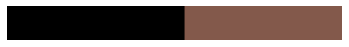

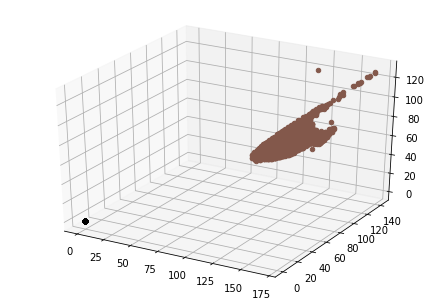

[131.25460405  88.99217311  75.04235727]


In [ ]:
import cv2
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    MAXFREQ = None

    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image

    def dominantColors(self):
        #img = cv2.imread(self.IMAGE)
        img = cv2.cvtColor(self.IMAGE, cv2.COLOR_BGR2RGB)
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        self.IMAGE = img
        range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
        silhouette_avg = []
        for num_clusters in range_n_clusters:

        # initialise kmeans
          kmeans = KMeans(n_clusters=num_clusters)
          kmeans.fit(img)
          cluster_labels = kmeans.labels_

          # silhouette score
          silhouette_avg.append(silhouette_score(img, cluster_labels))
        #plt.plot(range_n_clusters,silhouette_avg,'r-')
        #plt.xlabel('Values of K')
        #plt.ylabel('Silhouette score')
        #plt.title('Silhouette analysis For Optimal k')
        #plt.show()
        #k=2
        k=range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
        self.CLUSTERS=k
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(img)
        self.COLORS = kmeans.cluster_centers_
        self.LABELS = kmeans.labels_
        self.calcmaxfreq()
        return self.COLORS.astype(int)
    def calcmaxfreq(self):
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)

        #create frequency count tables
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()

        #appending frequencies to cluster centers
        colors = self.COLORS
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()]
        if colors[0].astype('int')[0] == 0 and colors[0].astype('int')[1] == 0 and colors[0].astype('int')[2] == 0:
          self.MAXFREQ=colors[1]
        else:
          self.MAXFREQ=colors[0]
    def plotHistogram(self):

        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)

        #create frequency count tables
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()

        #appending frequencies to cluster centers
        colors = self.COLORS
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()]
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        if colors[0].astype('int')[0] == 0 and colors[0].astype('int')[1] == 0 and colors[0].astype('int')[2] == 0:
          self.MAXFREQ=colors[1]
        else:
          self.MAXFREQ=colors[0]
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500

            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]

            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end

        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

    def plotClusters(self):
        #plotting
        fig = plt.figure()
        ax = Axes3D(fig)
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()


dc = DominantColors(myImg)
colors = dc.dominantColors()
dc.plotHistogram()
dc.plotClusters()
print(dc.MAXFREQ)


In [ ]:
tesx=[]
tesx.append(dc.MAXFREQ)

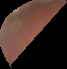

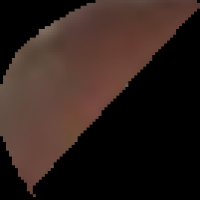

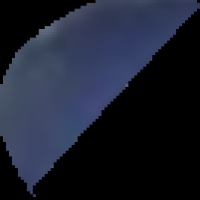

In [ ]:
from sklearn.preprocessing import normalize
import math

def conv(myImg):
  tmp = cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB)
  img2=tmp[tmp!=[0,0,0]]
  return img2
def AdaptBrightness(image):
  imagecp1=cv2.resize(image, (200,200), interpolation = cv2.INTER_AREA)
  roi_l,roi_a,roi_b=cv2.split(cv2.cvtColor(imagecp1,cv2.COLOR_BGR2LAB))
  m=np.amax(roi_l)
  roi_l=roi_l.astype('float64')
  roi_l/=m
  mn=np.mean(roi_l)
  imgraycpy=cv2.cvtColor(imagecp1, cv2.COLOR_BGR2GRAY)
  graymean=0
  tot=0
  #cv2_imshow(imgraycpy)
  for i in imgraycpy:
    for j in i:
      if j!=0:
        graymean+=j
        tot+=1
  graymean/=tot
  thr=math.log2(127.5)/math.log2(graymean)
  for i in range(len(imagecp1)):
    for j in range(len(imagecp1[0])):
      if imagecp1[i][j][0]==0 and imagecp1[i][j][1]==0 and imagecp1[i][j][2]==0:
        pass
      else:
        imagecp1[i][j]=imagecp1[i][j]**(1/thr)
  return imagecp1
i=myImg
cv2_imshow(i)
x=AdaptBrightness(myImg)

cv2_imshow(x)
cv2_imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))


In [ ]:
def load_data(data_dir):
  images=[]
  dc=[]
  anemic=[]
  i=j=0
  for pics in os.listdir(data_dir):
    if pics[0:3]=='Non':
      #if i==100:
      #  continue
      anemic.append(1)
      #i+=1
    else:
      #if j==100:
      #  continue
      anemic.append(0)
      #j+=1
    print(i,j)
    img=cv2.imread(os.path.join(data_dir,pics),1)
    img=AdaptBrightness(img)
    d = DominantColors(img)
    clrs=d.dominantColors()
    dc.append(d.MAXFREQ)
    img=cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)
    images.append(np.array(img))

    #if i==100 and j==100:
    #  break
  return images,dc,anemic

In [ ]:
imgs,dc,anemic=load_data("drive/MyDrive/Fingernails/Fingernails")

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
100 1
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
100 10
100 11
100 12
100 13
100 14
100 15
100 16
100 17
100 18
100 19
100 20
100 21
100 22
100 23
100 24
100 25
100 26
100 27
100 28
100 29
100 30
100 31
100 32
100 33
100 34
100 35
100 36
100 37
100 38
100 39
100 40
100 41
100 42
100 43
100 44
100 45
100 46
100 47
100 48
100 49
100 50
100 51
100 52
100 53
100 54
100 55
100 56
100 57
100 58
100 59
100 60
100 61
100 62
100 63
100 64
100 65
100 66
100 67
100 68
100 69
100 70
100 71
100 72
100 73
100 74

In [ ]:
anemic

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

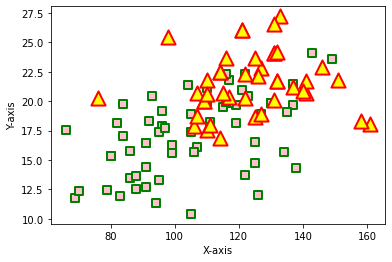

In [ ]:
x1=[datasetmod1['Haemoglobin'][i] for i in range(len(datasetmod1)) if datasetmod1['Final Diagnosis'][i]=="Yes"]
y1=[datasetmod1['Palpebral Conjunctiva EI (LX5)'][i] for i in range(len(datasetmod1)) if datasetmod1['Final Diagnosis'][i]=="Yes"]
x2=[datasetmod1['Haemoglobin'][i] for i in range(len(datasetmod1)) if datasetmod1['Final Diagnosis'][i]=="No"]
y2=[datasetmod1['Palpebral Conjunctiva EI (LX5)'][i] for i in range(len(datasetmod1)) if datasetmod1['Final Diagnosis'][i]=="No"]
plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)

plt.scatter(x2, y2, c ="yellow",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
x1=[datasetmod1['Haemoglobin'][i] for i in range(len(datasetmod1)) if datasetmod1['Final Diagnosis'][i]=="Yes"]
print(x1)

[134, 84, 123, 99, 79, 82, 122, 93, 119, 96, 137, 125, 105, 121, 80, 149, 117, 107, 126, 105, 110, 117, 80, 86, 116, 130, 143, 91, 69, 135, 122, 137, 115, 91, 111, 92, 127, 105, 106, 91, 95, 116, 95, 130, 110, 138, 119, 104, 97, 70, 94, 91, 96, 111, 88, 84, 99, 86, 88, 125, 83, 66]


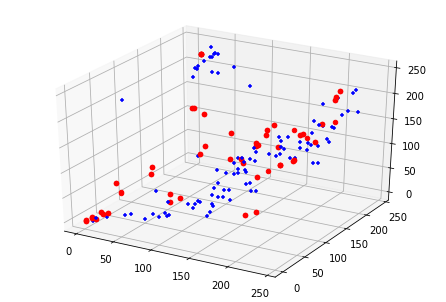

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = Axes3D(fig)
dc1=dc[0:100]
dc2=dc[100:200]
for i in dc1:
  ax.scatter3D(i[0],i[1],i[2],marker='+',c='b')
for i in dc2:
  ax.scatter3D(i[0],i[1],i[2],c='r')
plt.show()

In [ ]:
import math
HB=[]
for i in dc:
  x=-1.922+.206*i[0]-.241*i[1]+.012*i[2]
  HB.append((math.exp(x))/(1+math.exp(x)))

print(HB)
calcy=[1 if x<=.2 else 0 for x in HB]
print(calcy)
metrics.confusion_matrix(anemic, calcy)

[0.9984123905987745, 0.7951069416102412, 7.366389314093418e-22, 0.999997756136113, 0.01389183532222083, 0.9968676111117072, 0.009182144438098191, 0.9581953094249008, 0.8339381562143517, 0.9996404192023709, 0.9889921118716604, 0.9998623587166588, 0.9998156956621567, 0.9999987801687905, 0.9997149296347351, 0.9999623827052724, 0.3146553737903066, 4.297438842345306e-21, 0.5283067539094037, 0.9976597418404026, 6.792875387130083e-22, 2.93362582447006e-22, 0.9810635704814527, 0.7635372082091235, 0.9999990433184035, 0.85504780451316, 2.1658743216557603e-19, 1.0339061150313795e-18, 0.9996342515458531, 0.7296792883029244, 0.691033879175871, 0.9537580076426623, 6.612190995858677e-22, 0.9611907790361057, 0.9999915103493706, 0.8736112202081624, 1.4187910440006654e-22, 0.9976705839845404, 0.9985251854972432, 0.46863512373055527, 0.8956898190134489, 0.9957537051063726, 0.9608941727893081, 0.9968670773265292, 0.999990226261347, 0.9997873156034764, 4.524009410595715e-23, 0.9479044088768831, 6.242850221

array([[72, 28],
       [81, 19]])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
dc1=numpy.array(dc).T
df = pd.DataFrame(dc, columns = ['R','G','B'])
clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(df,anemic)
mlpanemia=clf.predict(df)
mlpanemia

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1])

Accuracy: 0.855
Precision Score: 0.8446601941747572
Recall Score: 0.87
F1 Score: 0.8571428571428571


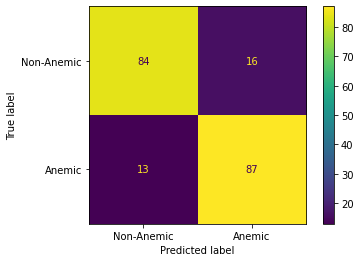

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(anemic, mlpanemia)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Anemic", "Anemic"])
print("Accuracy:",metrics.accuracy_score(anemic,mlpanemia))
## Precision
print("Precision Score:",metrics.precision_score(anemic,mlpanemia))
## Recall
print("Recall Score:",metrics.recall_score(anemic,mlpanemia))
## F1 Score
print("F1 Score:",metrics.f1_score(anemic,mlpanemia))
cm_display.plot()
plt.show()

Accuracy: 0.485
Precision Score: 0.4634146341463415
Recall Score: 0.19
F1 Score: 0.2695035460992908


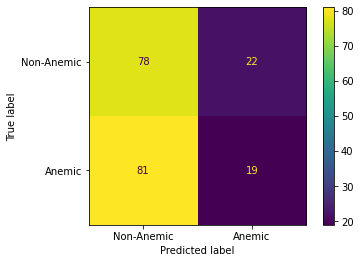

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(anemic, calcy)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Anemic", "Anemic"])
print("Accuracy:",metrics.accuracy_score(anemic,calcy))
## Precision
print("Precision Score:",metrics.precision_score(anemic,calcy))
## Recall
print("Recall Score:",metrics.recall_score(anemic,calcy))
## F1 Score
print("F1 Score:",metrics.f1_score(anemic,calcy))
cm_display.plot()
plt.show()

model 1 AUC score: 0.855


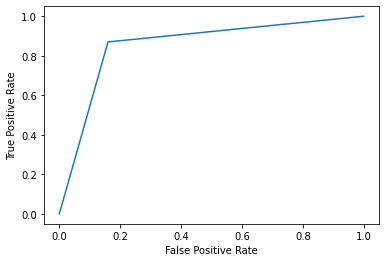

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(anemic, mlpanemia)
print(f'model 1 AUC score: {roc_auc_score(anemic, mlpanemia)}')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
dc1=numpy.array(dc).T
df1 = pd.DataFrame(dc, columns = ['R','G','B'])
X_train, X_test, y_train, y_test = train_test_split(df1, anemic, train_size=0.6)
clf1 = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(X_train,y_train)
mlpanemia1=clf1.predict(df)
mlpanemia


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1])

Accuracy: 0.825
Precision Score: 0.8918918918918919
Recall Score: 0.7674418604651163
F1 Score: 0.825


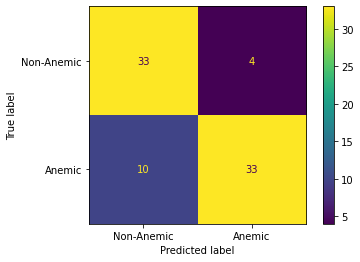

In [ ]:
ypred=clf1.predict(X_test)
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, ypred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Anemic", "Anemic"])
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
## Precision
print("Precision Score:",metrics.precision_score(y_test, ypred))
## Recall
print("Recall Score:",metrics.recall_score(y_test, ypred))
## F1 Score
print("F1 Score:",metrics.f1_score(y_test, ypred))
cm_display.plot()
plt.show()

In [ ]:
ypred=clf1.predict(X_test)
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, ypred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Anemic", "Anemic"])
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
## Precision
print("Precision Score:",metrics.precision_score(y_test, ypred))
## Recall
print("Recall Score:",metrics.recall_score(y_test, ypred))
## F1 Score
print("F1 Score:",metrics.f1_score(y_test, ypred))
cm_display.plot()
plt.show()

NameError: ignored